In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [36]:
model = keras.models.load_model('../models/fruitNet/fruitNet_99.h5')

In [37]:
model.save_weights('../models/fruitNet/fruitNet_99_weights.h5')

In [20]:
import pathlib
test_dir = "../data/fruitNet/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
)

Found 15 files belonging to 1 classes.


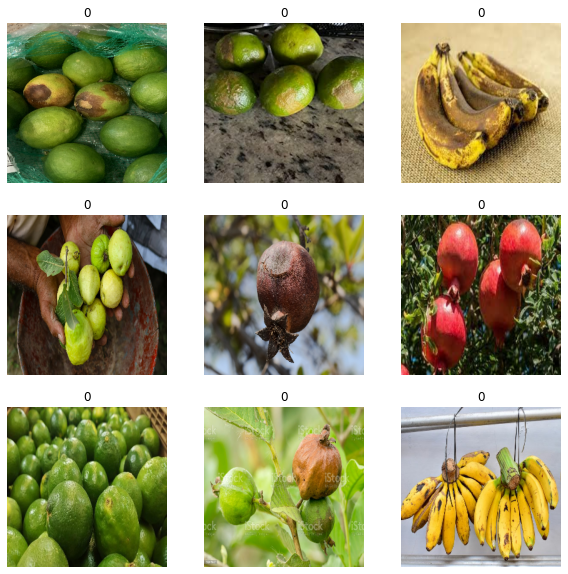

In [18]:

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [14]:
preprocessing_input = tf.keras.applications.inception_resnet_v2.preprocess_input

In [6]:
testGen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= preprocessing_input)

In [86]:
test_ds =testGen.flow_from_directory(test_dir, 
                                        class_mode='categorical', 
                                        batch_size=32,
                                        target_size=(256, 256),
                                        )

Found 18 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

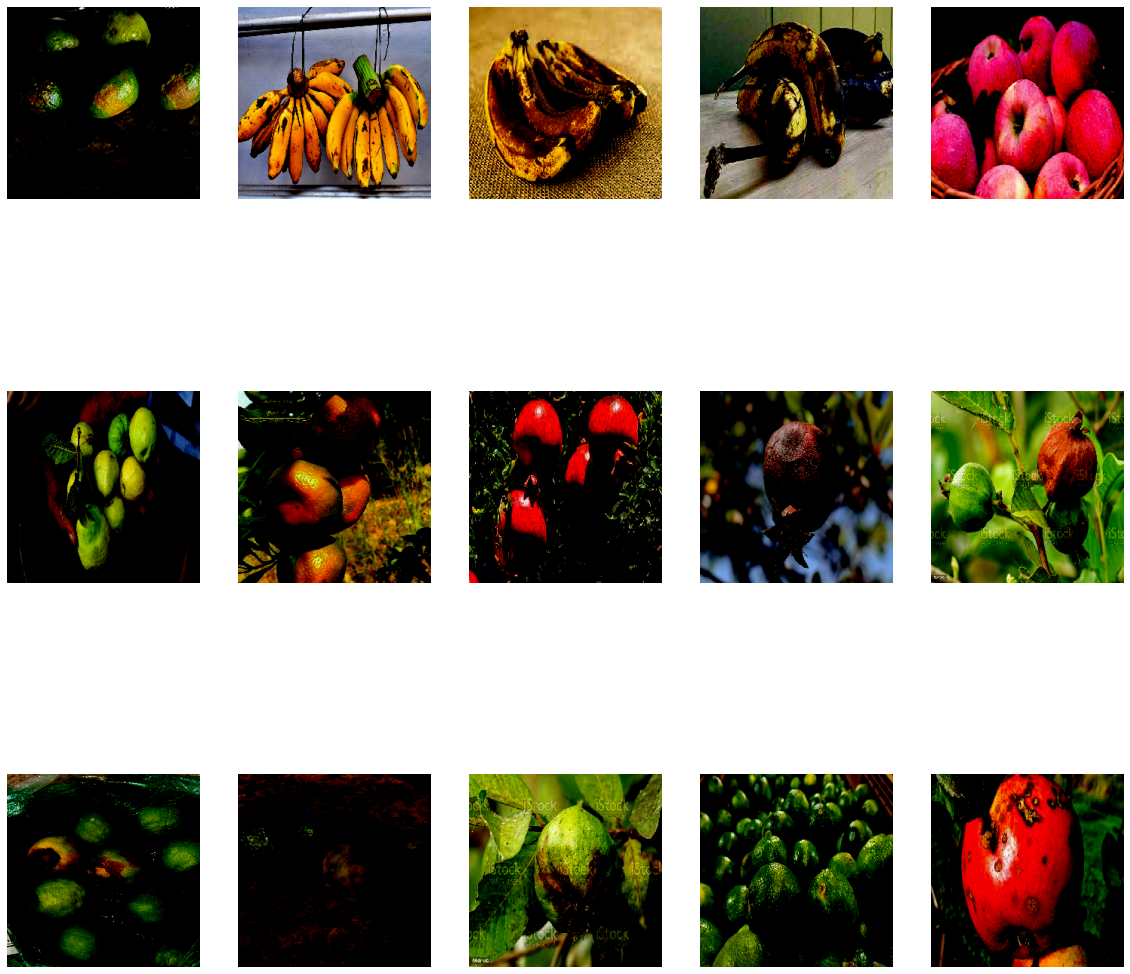

In [30]:
# visualization test_ds
from matplotlib import pyplot as plt

fit, ax = plt.subplots(3, 5, figsize=(20, 20))
ax = ax.flatten()

for i in range(15):
    img = test_ds[0][0][i]
    ax[i].imshow(img)
    ax[i].axis('off')

In [9]:
label_file = open("../models/fruitNet/labels.txt", "r")

labels = label_file.read().splitlines()

In [10]:
sorted_labels = sorted(labels)
sorted_labels

['Apple_Bad',
 'Apple_Good',
 'Apple_mixed',
 'Banana_Bad',
 'Banana_Good',
 'Banana_mixed',
 'Guava_Bad',
 'Guava_Good',
 'Guava_mixed',
 'Lemon_mixed',
 'Lime_Bad',
 'Lime_Good',
 'Orange_Bad',
 'Orange_Good',
 'Orange_mixed',
 'Pomegranate_Bad',
 'Pomegranate_Good',
 'Pomegranate_mixed']

In [22]:
y_test = keras.utils.to_categorical(test_ds, 18)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'BatchDataset'

In [43]:
loss, acc = loaded_model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

TypeError: in user code:

    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\engine\training.py", line 1053, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\losses.py", line 159, in __call__
        losses, sample_weight, reduction=reduction
    File "d:\Dev\tools\envs\tf\lib\site-packages\keras\utils\losses_utils.py", line 328, in compute_weighted_loss
        losses = tf.convert_to_tensor(losses)

    TypeError: Failed to convert elements of <keras.losses.CategoricalCrossentropy object at 0x0000017964722408> to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.


In [87]:
predictions = loaded_model.predict(test_ds)
predictions

1/1 [==============================] - 7s 7s/step


array([[1.47952706e-10, 1.39094277e-06, 2.33999572e-06, 8.85961455e-08,
        1.86295712e-09, 4.79476086e-08, 3.30188047e-12, 1.14863815e-05,
        1.35927749e-08, 1.98413036e-04, 3.45087324e-06, 3.02370381e-06,
        8.04678166e-07, 9.99706447e-01, 7.01512909e-05, 8.16946987e-13,
        1.45654360e-06, 8.96638653e-07],
       [3.94825774e-16, 1.41352672e-07, 1.14145360e-11, 1.39736583e-10,
        2.43041568e-12, 3.16748441e-08, 1.47414094e-16, 1.11275496e-12,
        7.40920450e-11, 4.27037214e-08, 2.37467663e-12, 3.14055867e-15,
        1.04503570e-08, 8.31505389e-08, 9.99945760e-01, 2.09945015e-15,
        2.40223271e-05, 2.98419181e-05],
       [6.11081671e-11, 1.98598955e-05, 1.52114293e-11, 5.02353981e-09,
        6.41761644e-11, 7.40366435e-09, 1.97068246e-13, 1.55436544e-04,
        1.12135544e-11, 1.02332298e-09, 4.82036980e-12, 7.23666405e-11,
        8.84758791e-08, 9.99824345e-01, 1.69261410e-10, 3.82737489e-13,
        1.84021857e-07, 2.29451284e-11],
       [3.456

In [33]:
predictions = model.predict(test_ds)
predictions

1/1 [==============================] - 15s 15s/step


array([[8.81976512e-13, 1.86924083e-18, 1.54802792e-21, 9.99999881e-01,
        4.05702742e-17, 3.71181375e-09, 1.98183907e-14, 4.02525981e-15,
        2.83487576e-18, 1.44304808e-20, 2.57768352e-16, 1.98759514e-27,
        4.06602947e-13, 1.69866479e-22, 1.47371315e-18, 1.53767033e-07,
        5.19810802e-18, 2.43060683e-16],
       [3.24433501e-11, 3.45201357e-07, 6.06822468e-08, 9.19780874e-08,
        1.72647563e-10, 4.64426364e-08, 2.16433032e-13, 9.90688477e-06,
        4.03309386e-10, 1.22878092e-07, 1.13428289e-09, 3.27397798e-09,
        1.11147330e-07, 9.99984741e-01, 4.54923520e-06, 3.84317271e-15,
        1.36205880e-09, 4.11732781e-09],
       [3.73437670e-10, 3.88768218e-09, 2.18599041e-08, 1.82319155e-08,
        5.40157467e-11, 2.95399722e-08, 3.56099386e-11, 8.31167427e-12,
        4.57734510e-11, 3.81187096e-12, 6.28272642e-11, 4.43827480e-19,
        1.88101823e-09, 2.71387556e-15, 2.80437207e-09, 2.39772037e-01,
        8.29288820e-06, 7.60219574e-01],
       [1.453

In [88]:
pred = np.argmax(predictions, axis=1)
pred

array([13, 14, 13, 13,  1,  1, 13, 13,  7, 13,  1,  3,  7,  7, 15, 17,  3,
        4], dtype=int64)

In [89]:
for i in pred:
    print(sorted_labels[i])
    

Orange_Good
Orange_mixed
Orange_Good
Orange_Good
Apple_Good
Apple_Good
Orange_Good
Orange_Good
Guava_Good
Orange_Good
Apple_Good
Banana_Bad
Guava_Good
Guava_Good
Pomegranate_Bad
Pomegranate_mixed
Banana_Bad
Banana_Good


In [61]:
loaded_model = keras.models.load_model('../models/fruitNet/fruitNet_99.h5')
loaded_model.load_weights('../models/fruitNet/fruitNet_99_weights.h5')

In [55]:
loaded_model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [63]:
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 inception_resnet_v2 (Functi  (None, 6, 6, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1536)              0         
                                                                 
 dense_1 (Dense)             (None, 18)                2766

In [66]:
labels_dict = {'Apple_Bad': 0,
 'Apple_Good': 1,
 'Apple_mixed': 2,
 'Banana_Bad': 3,
 'Banana_Good': 4,
 'Banana_mixed': 5,
 'Guava_Bad': 6,
 'Guava_Good': 7,
 'Guava_mixed': 8,
 'Lemon_mixed': 9,
 'Lime_Bad': 10,
 'Lime_Good': 11,
 'Orange_Bad': 12,
 'Orange_Good': 13,
 'Orange_mixed': 14,
 'Pomegranate_Bad': 15,
 'Pomegranate_Good': 16,
 'Pomegranate_mixed': 17}

In [68]:
loaded_model.predict(test_ds)

1/1 [==============================] - 10s 10s/step


array([[5.98013816e-09, 9.95060742e-01, 5.00984809e-09, 2.36700498e-06,
        6.10885851e-04, 2.42274091e-05, 6.52830545e-09, 3.89783061e-03,
        2.04679260e-08, 1.25672739e-09, 2.08802886e-09, 3.47625193e-11,
        1.91261531e-08, 9.28429813e-08, 9.84073800e-09, 6.79515892e-07,
        4.03023412e-04, 1.60945959e-08],
       [2.41415677e-07, 9.99998331e-01, 1.34696450e-06, 4.41137765e-10,
        3.77183368e-10, 1.48132401e-07, 8.23659543e-12, 2.72818692e-08,
        2.04528594e-09, 1.10013533e-10, 1.28419099e-13, 3.26717998e-16,
        6.06965767e-09, 5.31769795e-10, 4.15950607e-11, 6.54933058e-14,
        4.65274796e-09, 2.28214798e-08],
       [6.11081671e-11, 1.98598955e-05, 1.52114293e-11, 5.02353981e-09,
        6.41761644e-11, 7.40366435e-09, 1.97068246e-13, 1.55436544e-04,
        1.12135544e-11, 1.02332298e-09, 4.82036980e-12, 7.23666405e-11,
        8.84758791e-08, 9.99824345e-01, 1.69261410e-10, 3.82737489e-13,
        1.84021857e-07, 2.29451284e-11],
       [1.591

1/1 [==============================] - 1s 688ms/step
Restored model, accuracy:  0.00%
[14]
prediction: Orange_mixed


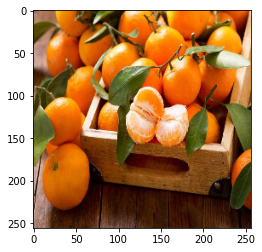

In [84]:
# prediction one image
from matplotlib import pyplot as plt
image_path = "../data/fruitNet/tests/18.jpg"

img = keras.preprocessing.image.load_img(image_path, target_size=(256, 256))

img_arr = np.expand_dims(img, 0)
img_arr = tf.keras.applications.inception_resnet_v2.preprocess_input(img_arr)
pred = loaded_model.predict(img_arr)
# loss, acc = loaded_model.evaluate(img_arr)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
# score = tf.nn.softmax(pred[0])
pred = np.argmax(pred, axis=1)
print(pred)
print(f"prediction: {sorted_labels[pred[0]]}")
plt.imshow(img)

1/1 [==============================] - 1s 838ms/step


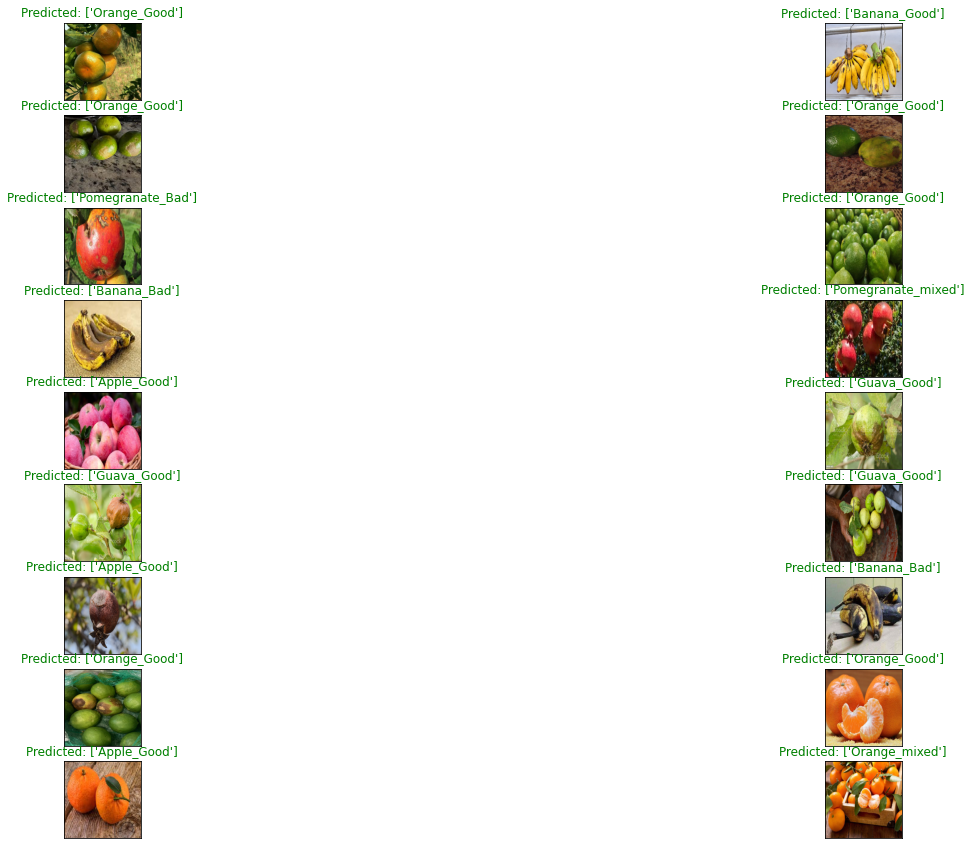

In [93]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

random_index = np.random.randint(1, 18,18)
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = load_img(test_dir+"tests/"+str(i+1)+'.jpg', target_size=(256, 256, 3))
    ax.imshow(img)
    img = image.img_to_array(img)
    img_arr = np.expand_dims(img, 0)
    img_arr = preprocessing_input(img_arr)
    pred = loaded_model.predict(img_arr)
    
    pred = np.argmax(pred,axis=1)

    # Map the label
    # labels = (train_dataset.class_indices)
    # labels = dict((v,k) for k,v in labels.items())
    pred = [sorted_labels[k] for k in pred]

    ax.set_title(f"Predicted: {pred}", color='green')
plt.show()


In [ ]:
loss, acc = model.evaluate(test_ds)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 1s 1s/step - loss: 93.4525 - accuracy: 0.0667
Restored model, accuracy:  6.67%
